Stock prediction notebook - Predicting stock prices of **NASDAQ:APPL** using 30-day data from **yahoo finance**

Relevant link(s) to get started with the notebook :
https://in.finance.yahoo.com/quote/AAPL/history/

**Dependencies**: <br>
pip install csv <br>
pip install numpy <br>
pip install sklearn <br>
pip install matplotlib <br>

In [1]:
# import statements
import csv
import numpy as np
from sklearn import svm as svm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dates = []
prices = []

def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

In [3]:
def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1))
    svr_lin = svm.SVR(kernel= 'linear', C=1e3)
    svr_poly = svm.SVR(kernel= 'poly', C=1e3, degree = 2)
    svr_rbf = svm.SVR(kernel= 'rbf', C=1e3, gamma = 0.1)
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='Linear model')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='Polynomial model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

[2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 22, 23, 24, 25, 28, 29, 30]
[154.889999, 143.979996, 144.529999, 148.699997, 149.559998, 151.289993, 152.5, 152.880005, 150.850006, 150.270004, 153.080002, 154.199997, 157.5, 156.410004, 154.149994, 154.110001, 155.479996, 155.789993, 156.25, 163.25]


G:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


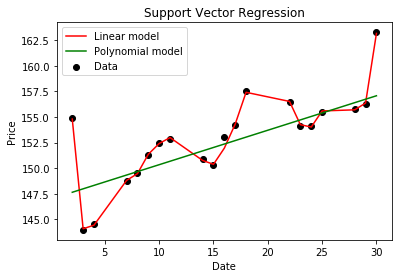

Predicted Price =  (156.3502518821646, 156.7258778824161, 156.3810659739205)


In [4]:
get_data('AAPL.csv')
print(dates)
print(prices)
predicted_price = predict_prices(dates, prices, [[29]])
print("Predicted Price = ", predicted_price)